<a href="https://colab.research.google.com/github/madan-genai/LangGraph/blob/main/CHATBOT_USING_LANGGRAPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install langgraph langchain langchain_google_genai langchain_core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.6 MB/s eta 0:00:00


In [22]:
import os
os.environ["GEMINI_API_KEY"]="A6pJY"

In [30]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver

In [24]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
  messages : Annotated[list[BaseMessage], add_messages]

In [25]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [26]:
def chat_node(State: ChatState):
  # take user query from state
  messages = State["messages"]

  # sent to llm
  response = llm.invoke(messages)

  # response to store in state
  return {"messages":[response]}

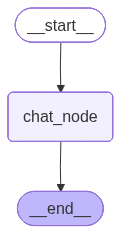

In [31]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)
graph.add_node("chat_node",chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node",END)

chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [28]:
initial_state = {
    "messages":[HumanMessage(content="What is the capital of Pakistan")]
}
chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='What is the capital of Pakistan', additional_kwargs={}, response_metadata={}, id='453ebf7b-452f-40ef-9d12-025d5830e490'),
  AIMessage(content='The capital of Pakistan is **Islamabad**.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c780c-1a9d-7520-8ef2-6d9b737e30fc-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 7, 'output_tokens': 73, 'total_tokens': 80, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 64}})]}

In [32]:
thread_id = "1"

while True:
  user_message = input("Type here:")
  print("user:",user_message)
  if user_message.strip().lower() in ["exit","quit","bye"]:
    break
  config = {"configurable":{"thread_id":thread_id}}
  response = chatbot.invoke({"messages":[HumanMessage(content=user_message)]}, config=config)
  print("AI:",response["messages"][-1].content)

Type here:hi
user: hi
AI: Hi there! How can I help you today?
Type here:i am madan
user: i am madan
AI: Nice to meet you, Madan!

How can I help you today?
Type here:what is my name
user: what is my name
AI: Your name is Madan.
Type here:bye
user: bye


In [33]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='817c3271-97a3-4763-81f5-d40d5e375c73'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c7817-ac75-79e3-b077-2ce364dc5fed-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 2, 'output_tokens': 33, 'total_tokens': 35, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 23}}), HumanMessage(content='i am madan', additional_kwargs={}, response_metadata={}, id='c1a32067-f04e-4148-8419-16416a606175'), AIMessage(content='Nice to meet you, Madan!\n\nHow can I help you today?', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c7817-d4e5-7